In [1]:
import os
os.environ["ZFIT_DISABLE_TF_WARNINGS"] = "1"

import zfit
from zfit import z
import numpy as np
import matplotlib.pyplot as plt

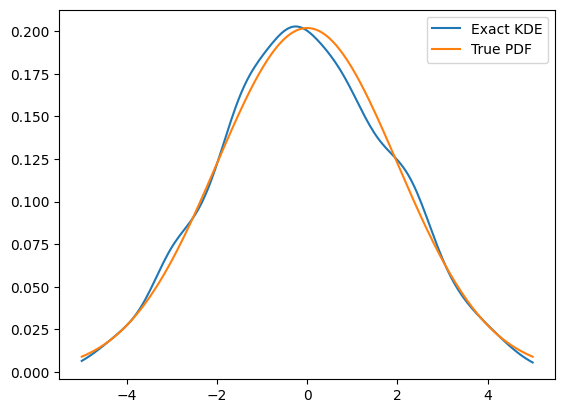

In [2]:
obs = zfit.Space('x', (-5, 5))
gauss = zfit.pdf.Gauss(obs=obs, mu=0, sigma=2)
data = gauss.sample(1000)

kde = zfit.pdf.KDE1DimExact(data,
                            # obs, bandwidth, kernel,
                            # padding, weights, name
                            )
x = np.linspace(-5, 5, 200)
plt.plot(x, kde.pdf(x), label='Exact KDE')
plt.plot(x, gauss.pdf(x), label='True PDF')
plt.legend()

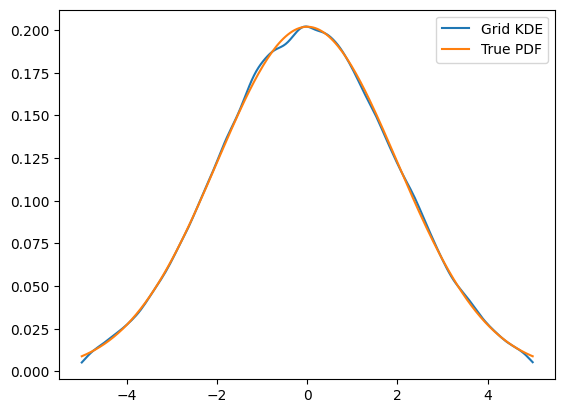

In [3]:
data = gauss.sample(100_000)

kde = zfit.pdf.KDE1DimGrid(data,
                           # obs, bandwidth, kernel, num_grid_points,
                           # binning_method, padding, weights, name
                           )
plt.plot(x, kde.pdf(x), label='Grid KDE')
plt.plot(x, gauss.pdf(x), label='True PDF')
plt.legend()

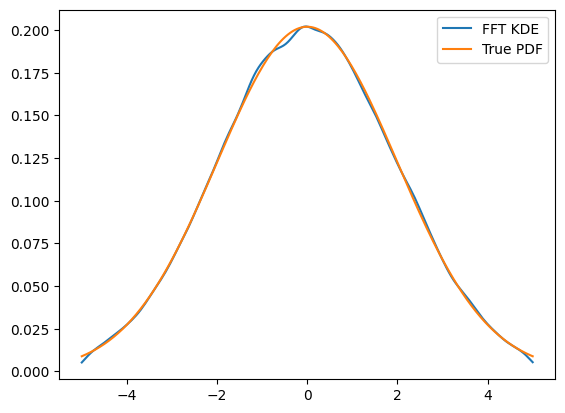

In [4]:
kde = zfit.pdf.KDE1DimFFT(data,
                          # obs, bandwidth, kernel, num_grid_points, fft_method,
                          # binning_method, padding, weights, name
                          )
plt.plot(x, kde.pdf(x), label='FFT KDE')
plt.plot(x, gauss.pdf(x), label='True PDF')
plt.legend()

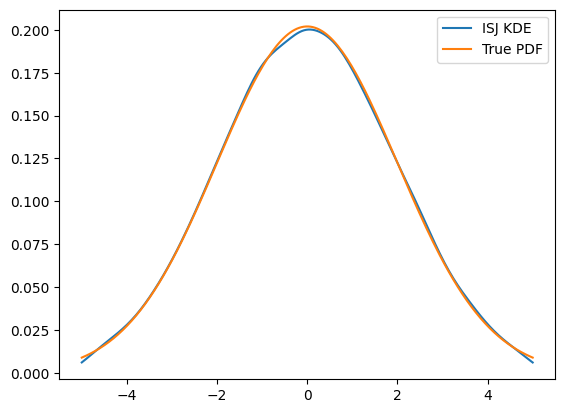

In [5]:
kde = zfit.pdf.KDE1DimISJ(data,
                          # obs, num_grid_points, binning_method,
                          # padding, weights, name
                          )
plt.plot(x, kde.pdf(x), label='ISJ KDE')
plt.plot(x, gauss.pdf(x), label='True PDF')
plt.legend()

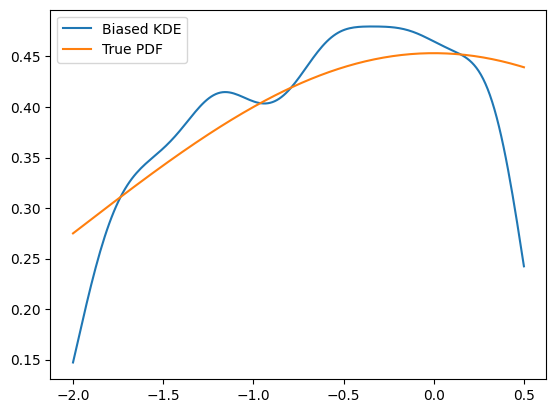

In [6]:
obs = zfit.Space('x', (-2, 0.5))  # will cut of data at -2, 0.5
data_narrow = gauss.sample(1000, limits=obs)

kde = zfit.pdf.KDE1DimExact(data_narrow)

x = np.linspace(-2, 0.5, 200)
plt.plot(x, kde.pdf(x), label='Biased KDE')
plt.plot(x, gauss.pdf(x, obs), label='True PDF')
plt.legend()

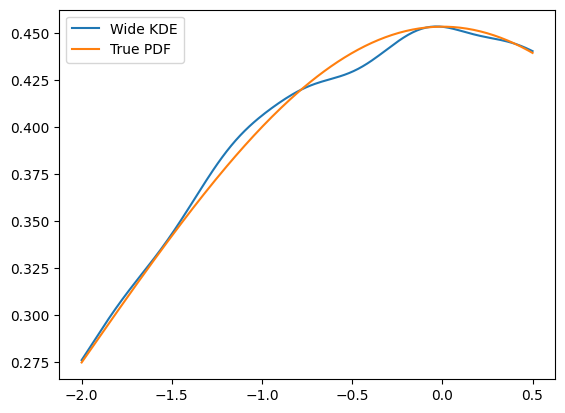

In [7]:
obs_wide = zfit.Space('x', (-5, 5))
data_wide = gauss.sample(1000, limits=obs_wide)

kde = zfit.pdf.KDE1DimExact(data, obs=obs)

plt.plot(x, kde.pdf(x), label='Wide KDE')
plt.plot(x, gauss.pdf(x, obs), label='True PDF')
plt.legend()

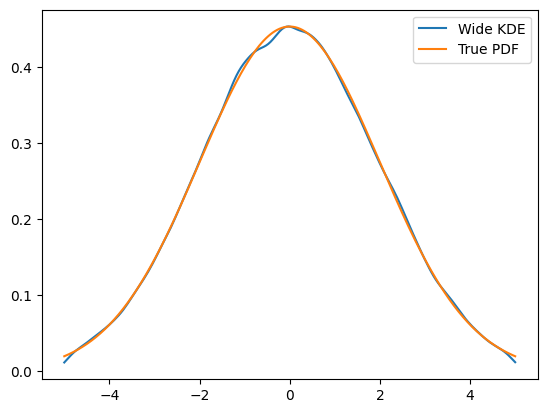

In [8]:
x = np.linspace(-5, 5, 200)
plt.plot(x, kde.pdf(x), label='Wide KDE')
plt.plot(x, gauss.pdf(x, obs), label='True PDF')
plt.legend()
x = np.linspace(-2, 0.5, 200)

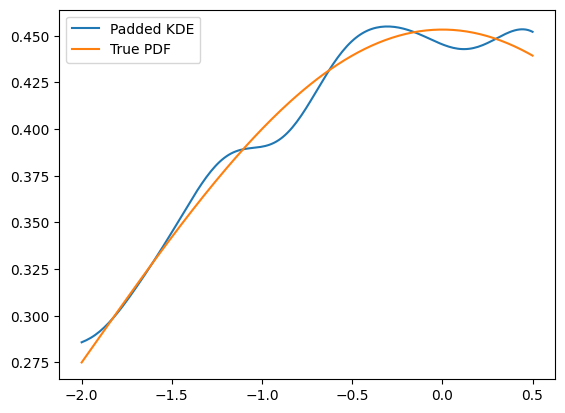

In [9]:
kde = zfit.pdf.KDE1DimExact(data_narrow, obs=obs, padding=0.2)

plt.plot(x, kde.pdf(x), label='Padded KDE')
plt.plot(x, gauss.pdf(x, obs), label='True PDF')
plt.legend()

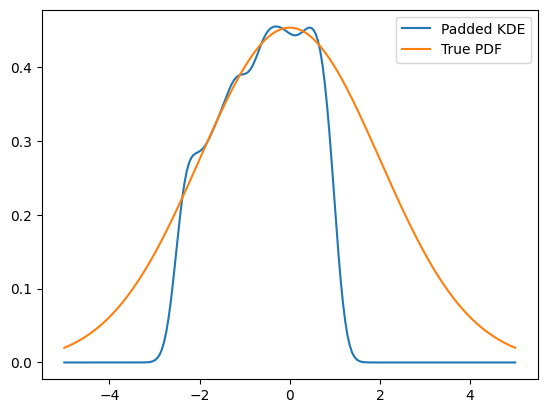

In [10]:
x = np.linspace(-5, 5, 200)
plt.plot(x, kde.pdf(x), label='Padded KDE')
plt.plot(x, gauss.pdf(x, obs), label='True PDF')
plt.legend()